In [1]:
import pandas as pd
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
xls=pd.ExcelFile('muertespandemiaNV_18marzo.xlsx') #le ponemos un nombre al archivo: "xls"

In [4]:
print(xls.sheet_names) #vemos qué hojas hay

['Sheet 1']


In [3]:
df=xls.parse('Sheet 1') #ahora identificaremos el archivo como "df"
print (df)

         Fecha  NumMuertes  ContagiosSieteDias  NumMuertes_2019  \
0   2020-01-01           7                 NaN                4   
1   2020-01-02           4                 NaN                8   
2   2020-01-03           6                 NaN                2   
3   2020-01-04           3            5.428571                5   
4   2020-01-05           7            5.285714                9   
..         ...         ...                 ...              ...   
433 2021-03-10          14           11.142857                7   
434 2021-03-11          13           11.714286                7   
435 2021-03-12          15           12.000000                2   
436 2021-03-13          10           12.857143                5   
437 2021-03-14          10           12.285714                5   

     MediaMovil_2019  
0                NaN  
1                NaN  
2                NaN  
3           5.571429  
4           5.285714  
..               ...  
433         4.714286  
434        

In [4]:
#ahora empezamos con el intento de gráfico (que al final sí salió)
import matplotlib.pyplot as plt

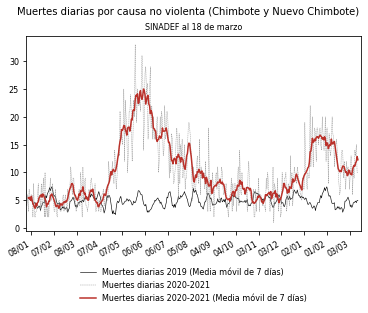

In [29]:
plt.plot( 'Fecha', 'MediaMovil_2019', data=df, marker='', color='black', linewidth=0.6, label="Muertes diarias 2019 (Media móvil de 7 días)")
plt.plot( 'Fecha', 'NumMuertes', data=df, marker='', color='#8A8A8A', linewidth=0.4, linestyle='--', label="Muertes diarias 2020-2021")
plt.plot( 'Fecha', 'ContagiosSieteDias', data=df, marker='', color='#BA312A', linewidth=1.5, label="Muertes diarias 2020-2021 (Media móvil de 7 días)")
#Aquí hay más info sobre cómo editar el gráfico
#https://stackoverflow.com/questions/9627686/plotting-dates-on-the-x-axis-with-pythons-matplotlib/9627970 (última respuesta)
#Significado de códigos para fechas https://estadisticamente.com/trabajando-con-fechas-en-r/
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m')) 
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30)) #Importante el intervalo
plt.gcf().autofmt_xdate()#esto hace que las fechas alcancen en el área del gráfico (en este caso, rota el texto a 30°)
#plt.xticks(fontsize=8, rotation=45)#con esto le damos el giro exacto y el tamaño de letra que queremos
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)


plt.title("SINADEF al 18 de marzo",fontsize=8)
plt.suptitle("Muertes diarias por causa no violenta (Chimbote y Nuevo Chimbote)",fontsize=10)
#plt.legend(loc='lower center') #le pedimos que muestre la leyenda, forma n° 1
#plt.legend(['Example legend'],loc='upper center') #le pedimos que muestre la leyenda, forma n° 2
plt.gca().legend(loc='lower center', bbox_to_anchor=(0.5, -0.4), fontsize=8, frameon=False) #leyenda forma n° 3, más info: https://queirozf.com/entries/matplotlib-examples-displaying-and-configuring-legends

#le ponemos límite al eje X
plt.xlim('2020-01-01','2021-03-18') #más info: https://www.python-graph-gallery.com/191-custom-axis-on-matplotlib-chart

#plt.grid(True)
#plt.show()

plt.savefig("18demarzo.png", facecolor='w', edgecolor='w', dpi= 250, bbox_inches="tight",  pad_inches=0.2, transparent = False)